# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import re

# Natural Langauge Toolkit
from nltk.corpus import stopwords
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])

import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

import sys
import os
import re
from sqlalchemy import create_engine
import pickle

from scipy.stats import gmean
# import relevant modules from the sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import BaseEstimator,TransformerMixin

# mitigate target/label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# saving model
import pickle

[nltk_data] Downloading package punkt to /Users/fish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/fish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# load data from database
engine = create_engine('sqlite:///data/DisasterResponse.db')
df = pd.read_sql_table('Disasters', con=engine)
# df = pd.read_sql_table('responsetable', 'sqlite:///final_response.db')  

In [4]:
df.describe() #not from the describe, child_alone has a whole column of zero, we should be able to just drop this.

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.00000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.0,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,15224.82133,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,0.0,0.063778,0.111497,0.088267,0.015449,0.023039,0.011367,0.033377,0.045545,0.131446,0.065037,0.045812,0.050847,0.020293,0.006065,0.010795,0.004577,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,8826.88914,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,0.0,0.244361,0.314752,0.283688,0.123331,0.150031,0.106011,0.179621,0.208500,0.337894,0.246595,0.209081,0.219689,0.141003,0.077643,0.103338,0.067502,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7446.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15662.50000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22924.25000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30265.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From above and also below, only the 'related' may have a mistake, i.e. 0, 1, 2

In [5]:
# df['related'].value_counts()
df.groupby('related').count() # when using goupby, follow up with some metric, in this case count but could be mean - for example.

,id,message,original,genre,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
related,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,6122,6122,3395,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122
1.0,19906,19906,6643,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906,19906
2.0,188,188,132,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188


In [6]:
def replace_with_majority(row):
    # import pdb; pdb.set_trace()
    if row == 2.0:
        return 1.0
    return row

df['related'] = df['related'].apply(replace_with_majority)
df['related'].value_counts() # great, we've gotten rid of the 2.0 which was most probably an error.

1.0    20094
0.0     6122
Name: related, dtype: int64

## Remove Class with only 0.0 (child_alone)
If this class is not removed, will run into the error below:
**valueerror: this solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0**

In [7]:
df.drop(['child_alone'], axis=1, inplace=True)

In [8]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# ------------------------------------
X = df['message']
y = df.iloc[:,4:]
# ------------------------------------
features = df['message']
labels = df.iloc[:,4:] # take from 4 col, i.e. 'id', 'origignal', 'message', and 'genre' cols do not have any value and not labels.
# features # note, we can do some clearning here.
X.shape, y.shape

((26216,), (26216, 35))

In [49]:
#----------------------------------------------------------------------------

In [50]:
# custom function for you to visualize all the cleaning of the text.
def normalize_clean(text):
    text = text.lower() # normalize
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) # remove punctuations
    text = re.sub(r'http\S+', '', text) # remove urls
    text = re.sub(r'[%$#]', '', text) # remove special chars
    text = re.sub("[^a-zA-Z]", " ", text) # clean numbers 
    return text

features = features.apply(normalize_clean)
features

0        weather update   a cold front from cuba that c...
1                  is the hurricane over or is it not over
2                          looking for someone but no name
3        un reports leogane       destroyed  only hospi...
4        says  west side of haiti  rest of the country ...
                               ...                        
26211    the training demonstrated how to enhance micro...
26212    a suitable candidate has been selected and och...
26213    proshika  operating in cox s bazar municipalit...
26214    some       women protesting against the conduc...
26215    a radical shift in thinking came about as a re...
Name: message, Length: 26216, dtype: object

Next we will remove stop words:
Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”)
This step is a one of the important steps to come up with more robust input. We will do all this in the tockenize def.

### 2. Write a tokenization function to process your text data

In [51]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenize_custom(text):    
    # Extract the word tokens from the provided text row 
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w in stop_words] #stopwords removal
    
    #Lemmanitizer to remove inflectional and derivationally related forms of a word
    lemmatizer = nltk.WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(w).strip() for w in tokens]
    
    return cleaned_tokens

features = features.apply(tokenize_custom)
features

[nltk_data] Downloading package stopwords to /Users/fish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [weather, update, cold, front, cuba, could, pa...
1                                              [hurricane]
2                                 [looking, someone, name]
3        [un, report, leogane, destroyed, hospital, st,...
4        [say, west, side, haiti, rest, country, today,...
                               ...                        
26211    [training, demonstrated, enhance, micronutrien...
26212    [suitable, candidate, selected, ocha, jakarta,...
26213    [proshika, operating, cox, bazar, municipality...
26214    [woman, protesting, conduct, election, teargas...
26215    [radical, shift, thinking, came, result, meeti...
Name: message, Length: 26216, dtype: object

In [10]:
def tokenize(text):    
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


## Summary of text preprocessing
* Normalize - to lowercase and cleaned up punctuation
* tokenize - to each individual word
* removal of stop words - reduce the dimensionality we are working with.
* stemming/lemmetization - to further reduce words we work with.

In [11]:
# from lecture - here is a custom transformer for us to include in our pipeline
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence)) # using our defined token() above after pos.
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return True
        return False

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [16]:
# We will try various models and use GridSearchCV to get the est hyperparameters for each model.
models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(verbose=True, class_weight='balanced'),
            "hyperparameters":
                {
                    "classifier__estimator__solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "AdaBoostClassifier",
            "estimator": AdaBoostClassifier(),
            "hyperparameters":
                {
                    'classifier__estimator__learning_rate': [0.01, 0.02, 0.05],
                    'classifier__estimator__n_estimators': [10, 20, 40]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1, verbose=True, class_weight='balanced'),
            "hyperparameters":
                {
                    "classifier__estimator__n_estimators": [20],
                    "classifier__estimator__criterion": ["entropy", "gini"],
                    "classifier__estimator__max_depth": [2, 5, 10],
                    "classifier__estimator__max_features": ["log2", "sqrt"],
                    "classifier__estimator__max_features": [1, 5, 8],
                    "classifier__estimator__min_samples_split": [2, 3, 5]

                }
        }
    ]

In [12]:
# from instructions above, suggesting for us to use MultiOuptuClassifier
# strategy based on fitting one classifier per target.

def build_model(models, tune_hyperparameters=False):
    pipes, grids = [], []
    # create a pipeline + GridSearch obj for each model.
    for model in models:
        # import pdb; pdb.set_trace()
        pipeline = Pipeline([
            ('features', FeatureUnion([

                ('text_pipeline', Pipeline([
                    ('vect', CountVectorizer(tokenizer=tokenize)),
                    ('tfidf', TfidfTransformer()) # adding addtional features.
                ])),

                ('starting_verb', StartingVerbExtractor())
            ])),

            ('classifier', MultiOutputClassifier(model['estimator']))
        ])
        # --------------------------------------------
        # Hyperameter tuning
        # --------------------------------------------
        cv = GridSearchCV(pipeline, param_grid=model['hyperparameters'], scoring='f1_micro', n_jobs=-1)
        grids.append(cv)
        pipes.append(pipeline)
    return grids if tune_hyperparameters else pipes

def display_results(cv, y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)

From above, we have CountVectorizer and tfidf running in parallel.
* convert to float/int for model to digest
* add additional features, i.e. tfidf transformation.

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [23]:
# verifying imbalance
for i, col in enumerate(y.columns):
    minority = y[col].value_counts().values
    min_perc = minority[1] / sum(minority)
    print("="*10, f"{minority[0], minority[1]} {col}: {min_perc}", "="*10)

========== (20094, 6122) related: 0.23352151357949344 ==========
========== (21742, 4474) request: 0.17065913945682026 ==========
========== (26098, 118) offer: 0.0045010680500457735 ==========
========== (15356, 10860) aid_related: 0.4142508391821788 ==========
========== (24132, 2084) medical_help: 0.0794934391211474 ==========
========== (24903, 1313) medical_products: 0.05008391821788221 ==========
========== (25492, 724) search_and_rescue: 0.027616722612145254 ==========
========== (25745, 471) security: 0.017966127555691182 ==========
========== (25356, 860) military: 0.03280439426304547 ==========
========== (24544, 1672) water: 0.0637778455904791 ==========
========== (23293, 2923) food: 0.11149679584986268 ==========
========== (23902, 2314) shelter: 0.08826670735428746 ==========
========== (25811, 405) clothing: 0.0154485810192249 ==========
========== (25612, 604) money: 0.023039365273115654 ==========
========== (25918, 298) missing_people: 0.011367104058590174 ==========


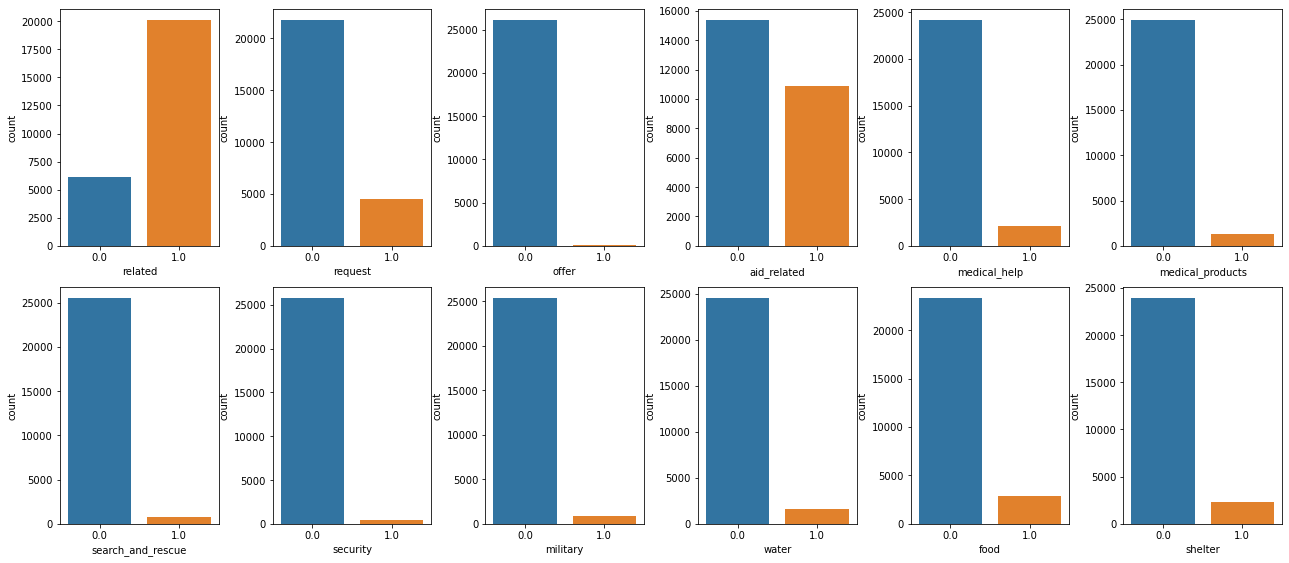

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = df.columns[4:]

def plot_imbalance(labels, y):
    # just plotting two rows to see imbalance.
    rows, cols = 2,6
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,8))
    fig.tight_layout(pad=2)
    i = 0
    for row in range(rows):
        for col in range(cols):
            sns.countplot(x=y[labels[i]] , data=y, ax=axes[row][col])
            i += 1
    plt.show()
plot_imbalance(labels, y)

In [25]:
import time

start_time = time.time()
print("="*10, "Started timer", "="*10)


# fit all 3 candidate baseline models without hyperparameter tuning - establish baseline.
pipelines = build_model(models=models,
                       tune_hyperparameters=False) 
trained_models = {}
for pipe, model in zip(pipelines, models):
    # import pdb; pdb.set_trace()
    trained_models[model['name']] = pipe.fit(X_train, y_train)
    print("=" * 25, model['name'], "=" * 25)

print(f"Trained all 3 models in: {time.time() - start_time} seconds.")

========== Started timer ==========


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

========================= LogisticRegression =========================
========================= AdaBoostClassifier =========================


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

========================= RandomForestClassifier =========================
Trained all 3 models in: 347.3277540206909


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.9s finished


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [29]:
len(trained_models) # 3 trained models
labels.columns.values

array(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'water', 'food', 'shelter', 'clothing', 'money', 'missing_people',
       'refugees', 'death', 'other_aid', 'infrastructure_related',
       'transport', 'buildings', 'electricity', 'tools', 'hospitals',
       'shops', 'aid_centers', 'other_infrastructure', 'weather_related',
       'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'], dtype=object)

In [30]:
for k, v in trained_models.items():
    # testing accuracy
    y_test_pred = v.predict(X_test)
    y_train_pred = v.predict(X_train)
    print("=" * 25, f" Test set: {k}", "=" * 25)
    print(classification_report(y_test.values, y_test_pred, target_names=labels.columns.values))
    print("=" * 25, f" Train set: {k}", "=" * 25)
    print(classification_report(y_train.values, y_train_pred, target_names=labels.columns.values))

=========================  Test set: LogisticRegression =========================
                        precision    recall  f1-score   support

               related       0.91      0.82      0.86      6598
               request       0.61      0.77      0.68      1472
                 offer       0.04      0.08      0.05        38
           aid_related       0.71      0.75      0.73      3545
          medical_help       0.36      0.67      0.47       701
      medical_products       0.33      0.65      0.43       446
     search_and_rescue       0.17      0.42      0.24       226
              security       0.10      0.21      0.14       160
              military       0.36      0.68      0.47       267
                 water       0.54      0.85      0.66       543
                  food       0.68      0.85      0.76       965
               shelter       0.54      0.80      0.64       775
              clothing       0.34      0.61      0.44       127
                 mone

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

=========================  Test set: RandomForestClassifier =========================
                        precision    recall  f1-score   support

               related       0.82      0.96      0.88      6598
               request       0.90      0.42      0.58      1472
                 offer       0.00      0.00      0.00        38
           aid_related       0.76      0.62      0.68      3545
          medical_help       0.73      0.02      0.04       701
      medical_products       0.81      0.04      0.07       446
     search_and_rescue       0.00      0.00      0.00       226
              security       0.00      0.00      0.00       160
              military       0.50      0.00      0.01       267
                 water       0.92      0.18      0.30       543
                  food       0.91      0.32      0.47       965
               shelter       0.88      0.09      0.17       775
              clothing       0.60      0.02      0.05       127
                 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


From the above we can clearly see that the f1-score on the testing sets for some categories are very low or even 0.0. This is becuase of the label/target mismatch.
* We will attempt to use SMOTE soon, to balance out the distribution of our labels.
* Also, note that hte RandomForest Classifier seems to be overfitting quiet a bit on the training set, e.g. 1.0 while on the test set, very low f1-score, did not generalize well.

### 6. Improve your model
Use grid search to find better parameters. 

In [15]:

models = [
#         {
#             "name": "LogisticRegression",
#             "estimator": LogisticRegression(verbose=True),
#             "hyperparameters":
#                 {
#                     "classifier__estimator__solver": ["newton-cg", "lbfgs", "liblinear"]
#                 }
#         },
#         {
#             "name": "AdaBoostClassifier",
#             "estimator": AdaBoostClassifier(),
#             "hyperparameters":
#                 {
#                     'classifier__estimator__learning_rate': [0.01, 0.02],
#                     'classifier__estimator__n_estimators': [20, 50, 80]
#                 }
#         },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1, verbose=True),
            "hyperparameters":
                {
                    "classifier__estimator__n_estimators": [10, 25],
                    "classifier__estimator__criterion": ["entropy", "gini"],
                    "classifier__estimator__max_depth": [2, 5, 10],
                    "classifier__estimator__min_samples_split": [2, 3, 5]

                }
        }
    ]

import time

start_time = time.time()
print("="*10, "Started timer", "="*10)
pipelines_grid = build_model(models=models, 
                        tune_hyperparameters=True)

trained_models_grid = {}
for pipe, model in zip(pipelines_grid, models):
    # import pdb; pdb.set_trace()
    trained_models_grid[model['name']] = pipe.fit(X_train, y_train)
    print("=" * 25, model['name'], "=" * 25)
    print("Completed GridSearch + fit !!!")
    print("=" * 25, model['name'], "=" * 25)
    
print(f"Completed hyperparameter tunning in: {(time.time() - start_time) / 60} min.")

========== Started timer ==========


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

========================= RandomForestClassifier =========================
Completed GridSearch + fit !!!
========================= RandomForestClassifier =========================
Completed hyperparameter tunning in: 15.926304197311401 min.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [16]:
for k, v in trained_models_grid.items():
    # testing accuracy
    # import pdb; pdb.set_trace()
    y_test_pred = v.predict(X_test)
    y_train_pred = v.predict(X_train)
    print("=" * 25, f" Test set: {k}", "=" * 25)
    print(v.best_params_)
    print(classification_report(y_test.values, y_test_pred, target_names=labels.columns.values))
    print("=" * 25, f" Train set: {k}", "=" * 25)
    print(classification_report(y_train.values, y_train_pred, target_names=labels.columns.values))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

=========================  Test set: RandomForestClassifier =========================
{'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': 10, 'classifier__estimator__min_samples_split': 2, 'classifier__estimator__n_estimators': 10}
                        precision    recall  f1-score   support

               related       0.76      1.00      0.87      6598
               request       0.50      0.00      0.00      1472
                 offer       0.00      0.00      0.00        38
           aid_related       0.85      0.13      0.23      3545
          medical_help       1.00      0.00      0.01       701
      medical_products       1.00      0.00      0.00       446
     search_and_rescue       0.00      0.00      0.00       226
              security       0.00      0.00      0.00       160
              military       0.00      0.00      0.00       267
                 water       0.00      0.00      0.00       543
                  food       0.

In [ ]:
parameters = 

cv = 

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [19]:
y_inf_train = pipeline_trained.predict(X_train)
y_inf_test = pipeline_trained.predict(X_test)

# Print classification report on test data
print(classification_report(y_test.values, y_inf_test, target_names=y.columns.values))

                        precision    recall  f1-score   support

               related       0.81      0.95      0.87      6598
               request       0.78      0.50      0.61      1472
                 offer       0.12      0.05      0.07        38
           aid_related       0.74      0.61      0.67      3545
          medical_help       0.57      0.25      0.35       701
      medical_products       0.60      0.30      0.40       446
     search_and_rescue       0.57      0.17      0.26       226
              security       0.17      0.03      0.04       160
              military       0.56      0.30      0.39       267
           child_alone       0.00      0.00      0.00         0
                 water       0.74      0.65      0.69       543
                  food       0.81      0.66      0.73       965
               shelter       0.76      0.53      0.63       775
              clothing       0.70      0.41      0.52       127
                 money       0.47      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
# from the above experiments, we swept through 3 types of models. Adaboost did the best

### 9. Export your model as a pickle file

In [ ]:
pickle.dump(model['estimator'], open('model.pkl', 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [ ]:
# Awesome!